tratteremo della generazione per inversione come uno dei metodi di campionamento, l'idea si basa sull'usare la funzione quantile/pseudoinversa e generare una serie di valori da una distribuzinoe uniforme ottenendo la distribuzione di partenza

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2, chisquare, expon

proviamo a generare un campione di osservazioni che seguono una distribuzione esponenziale parametro lambda=2

In [34]:
#funzione quantile
def qesp(x, rate):
    return -np.log(1-x)/rate
#generazione per inversione
def resp(n, rate):
    return qesp(np.random.uniform(size = n), rate)

sample = resp(10000, rate = 2)

ora andiamo a verificare la correttezza del campione generato:
1 CONVERGENZA IN DISTRIBUZIONE 


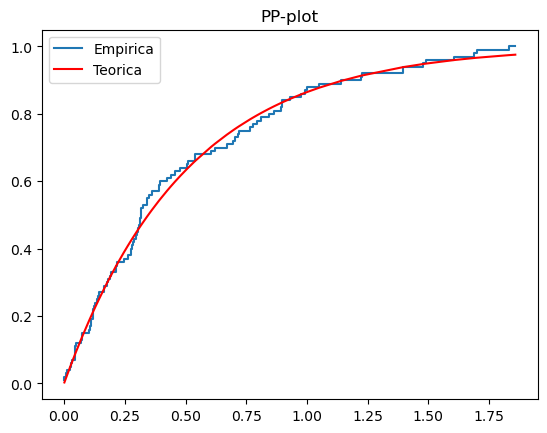

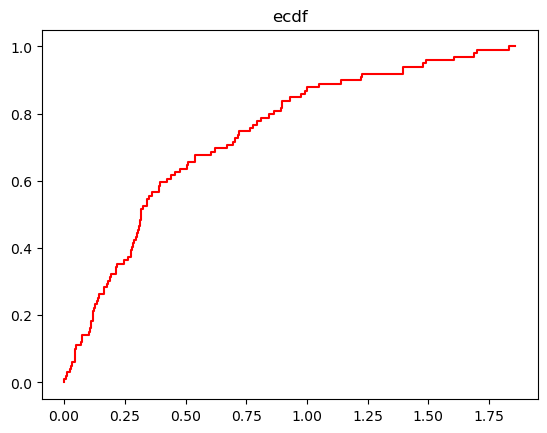

In [33]:
#stimiamo la funzione di ripartizione empirica
ecdf = np.arange(1, len(sample)+1)/len(sample)
plt.step(np.sort(sample), ecdf, label = 'Empirica')
plt.plot(np.sort(sample), expon.cdf(np.sort(sample), scale = 1/2), label  = 'Teorica', color = 'red')
plt.title("PP-plot")
plt.legend()
plt.show()


2 QQplot

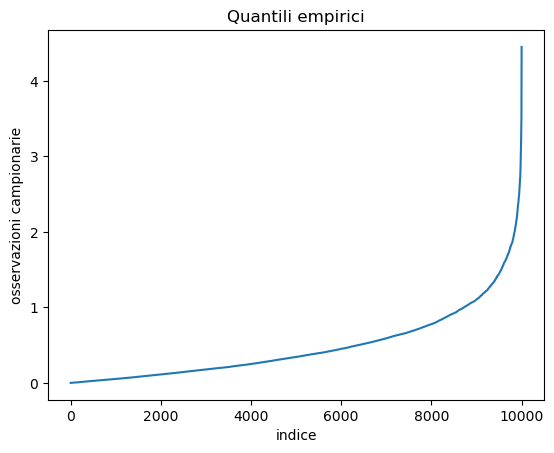

C:\Users\deli\AppData\Local\Temp\ipykernel_11620\2796376815.py:3: RuntimeWarning: divide by zero encountered in log
  return -np.log(1-x)/rate


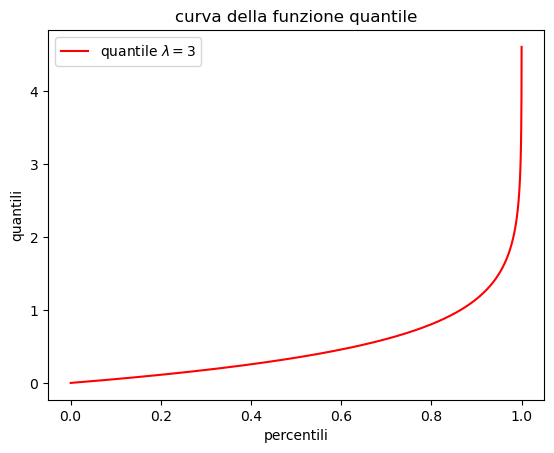

In [29]:
index = np.arange(1, len(sample)+1)
plt.plot(index, np.sort(sample))
plt.xlabel("indice")
plt.ylabel("osservazioni campionarie")
plt.title("Quantili empirici")
plt.show()

x = np.linspace(0.0001, 1, len(sample))
y = qesp(x, 2)
plt.plot(x, y, color = 'red', label = r'quantile $\lambda= 3$')
plt.xlabel("percentili")
plt.ylabel("quantili")
plt.legend()
plt.title("curva della funzione quantile")
plt.show()

3 CONVERGENZA IN PROBABILITà

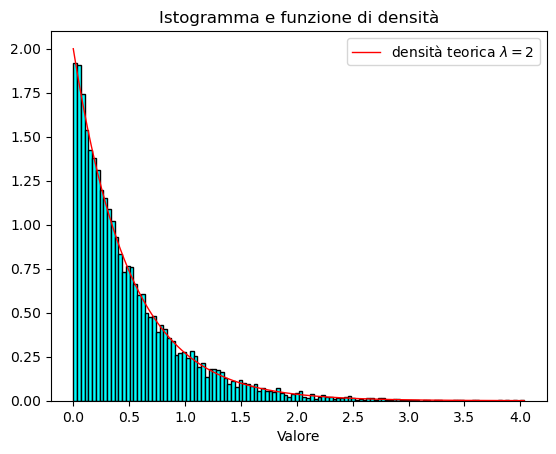

In [35]:
plt.hist(sample, bins = 120, facecolor = 'cyan', edgecolor = 'black', density = True)
val = np.linspace(0, np.max(sample), 1000)
plt.plot(val, expon.pdf(val, scale = 1/2), 'r-', lw = 1, label = r'densità teorica $\lambda= 2$')
plt.title("Istogramma e funzione di densità")
plt.xlabel("Valore")
plt.legend()
plt.show()